### This is a test notebook

In [2]:
import numpy as np
import data_loader
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import neural_network
import helpers
import data_loader

Finished.


In [3]:
importlib.reload(neural_network)
importlib.reload(helpers)
importlib.reload(data_loader)

inputSize = 28 * 28
outputSize = 10
minWeight = -0.0001
maxWeight = 0.0001
batchSize = 128
desiredError = 0.01
maxEpoch = 100
minDiff = 0.00001
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
layerSizes = [1, 20, 50, 100, 500]

inputs = data_loader.loadTrainInputs('../')
labels = data_loader.loadTrainOutputs('../')

results = []
for layerSize in layerSizes:
    for alpha in alphas:

        avgLosses = []
        avgEpochs = []
        avgAcc = []
        for i in range(10):
            network = neural_network.NeuralNetwork(
                layerSize, inputSize, outputSize, minWeight, maxWeight, minWeight, maxWeight,
                helpers.relu
            )
            (epoch, accuracy) = neural_network.teachNeuralNetworkWithInput(
                network, batchSize, alpha, desiredError, maxEpoch, 10000, minDiff, inputs,
                labels
            )
            print('i: ', i)
            print(
                layerSize, alpha, epoch, accuracy
            )
            avgAcc.append(accuracy)
            avgEpochs.append(epoch)

        epoch = np.average(avgEpochs)
        accuracy = np.average(avgAcc)
        
        result = (layerSize, alpha, epoch, accuracy)
        results.append(result)
        
        with open('exp1.txt', 'a') as fp:
            fp.write('{}'.format(result) + '\n')
        print(result)

frame = pd.DataFrame(results, columns=[
    'layerSize', 'learningRate', 'epoch', 'accuracy'
])
sns.relplot(data=frame, x='learningRate', y='error', hue='layerSize')

ch:  56
Correct:  8154 / 10000
Error:  0.05879383400902116
Epoch:  57
Correct:  8170 / 10000
Error:  0.05842725220160566
Epoch:  58
Correct:  8185 / 10000
Error:  0.05806174830099383
Epoch:  59
Correct:  8201 / 10000
Error:  0.05755146315737144
Epoch:  60
Correct:  8223 / 10000
Error:  0.05720280659584913
Epoch:  61
Correct:  8237 / 10000
Error:  0.0569163271600537
Epoch:  62
Correct:  8246 / 10000
Error:  0.05655349133211875
Epoch:  63
Correct:  8266 / 10000
Error:  0.056172735749923076
Epoch:  64
Correct:  8279 / 10000
Error:  0.05578661496672814
Epoch:  65
Correct:  8292 / 10000
Error:  0.05543740241446662
Epoch:  66
Correct:  8306 / 10000
Error:  0.05511638390720199
Epoch:  67
Correct:  8313 / 10000
Error:  0.05475503940709683
Epoch:  68
Correct:  8341 / 10000
Error:  0.05438447657197637
Epoch:  69
Correct:  8339 / 10000
Error:  0.054192119490282444
Epoch:  70
Correct:  8350 / 10000
Error:  0.05392295710354267
Epoch:  71
Correct:  8357 / 10000
Error:  0.05361232589604968
Epoch:  72

KeyboardInterrupt: 

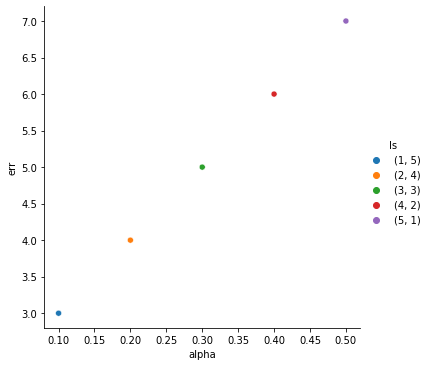

In [14]:
x = [
 ((1, 5), 0.1, 3, 8),
 ((2, 4), 0.2, 4, 9),
 ((3, 3), 0.3, 5, 10),
 ((4, 2), 0.4, 6, 11),
 ((5,1), 0.5, 7, 12) 
]

xd = pd.DataFrame(x, columns=['ls', 'alpha', 'err', 'test'])
sns.relplot(data=xd, x='alpha', y='err', hue='ls')